# Euler Maruyuma Integrator

The langevin equation is given by 

$$ \boxed{\frac{d\hat{x}(t)}{dt} = \mu(\hat{x}) f + k_BT\frac{\partial\mu(\hat{x})}{\partial t} + \sqrt{2Dk_BT\mu(\hat{x})}\hat{\xi}(t)} $$

where $ \boxed{\mu(\hat{x}) = D_0 |\hat{x}|^\alpha} $

### The Euler Maruyuma Integrator

This is the integrator for the langevin eqution given in the physics paper

$$ \boxed{x(t+dt) = x(t) +D_0  |x(t)|^\alpha dt + k_B T \left(\alpha D_0 |x(t)|^{\alpha -1} \dfrac{x(t)}{|x(t)|}\right) dt+\sqrt{2D_0 k_B T |x(t)|^\alpha dt}\hat{N}(t)} $$


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from numba import jit

In [230]:
D = 0.2
x_0 = 50
t_0 = 0
ALPHA = 1
F = -0.
F_2 = -0.3
k_BT =1

In [212]:
@jit
def process_sim(num,t_end):
    y = np.zeros(num)
    y[0] = x_0
    DT = (t_end-t_0)/num
    t = np.arange(t_0, t_end ,DT)
    for i in range(0,num-1):
        y[i+1] = np.round(y[i] + D * (np.abs(y[i])**ALPHA) * F * DT + k_BT * (ALPHA * D * ((np.abs(y[i])**(ALPHA-1)*(y[i]/(np.abs(y[i]))))))* DT+ np.sqrt(2 * D * k_BT * (np.abs(y[i])**ALPHA) *  DT) * np.random.normal(0,1),3)
    return t, y    

In [231]:
@jit
def process_sim2(num,t_end):
    y = np.zeros(num)
    y[0] = x_0
    DT = (t_end-t_0)/num
    t = np.arange(t_0, t_end ,DT)
    for i in range(0,num-1):
        y[i+1] = np.round(y[i] + D * (np.abs(y[i])**ALPHA) * F_2 * DT + k_BT * (ALPHA * D * ((np.abs(y[i])**(ALPHA-1)*(y[i]/(np.abs(y[i]))))))* DT+ np.sqrt(2 * D * k_BT * (np.abs(y[i])**ALPHA) *  DT) * np.random.normal(0,1),3)
    return t, y   

## $M_{free}$ Model
This is the model with zero force $f$, where $f=0$

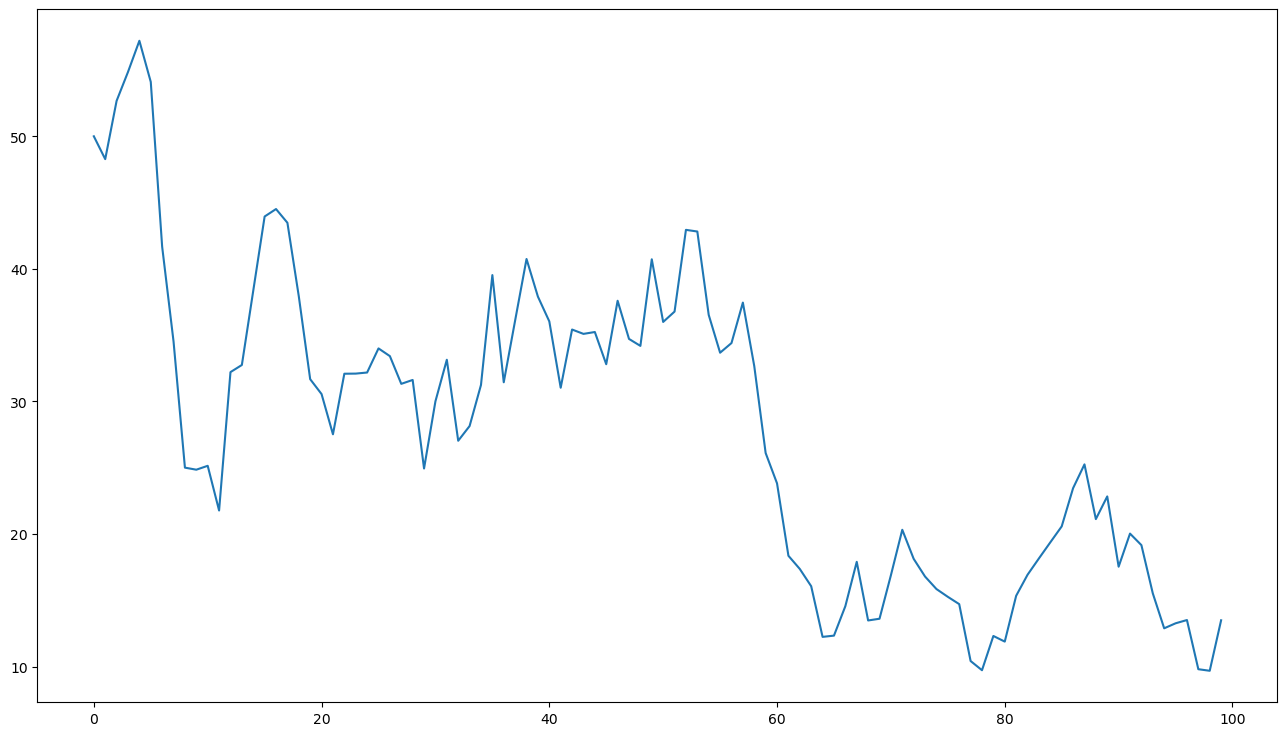

In [260]:
N = 1
n = 100
t_e = 100
n_stamp = 500
t_sample,p_sample = process_sim(n,t_e)
fig,axes = plt.subplots(1,1,figsize=(16,9))
axes.plot(t_sample,p_sample)    

## $M_{pull}$ Model
This is the model with non-zero $f$, where $f=-0.3$

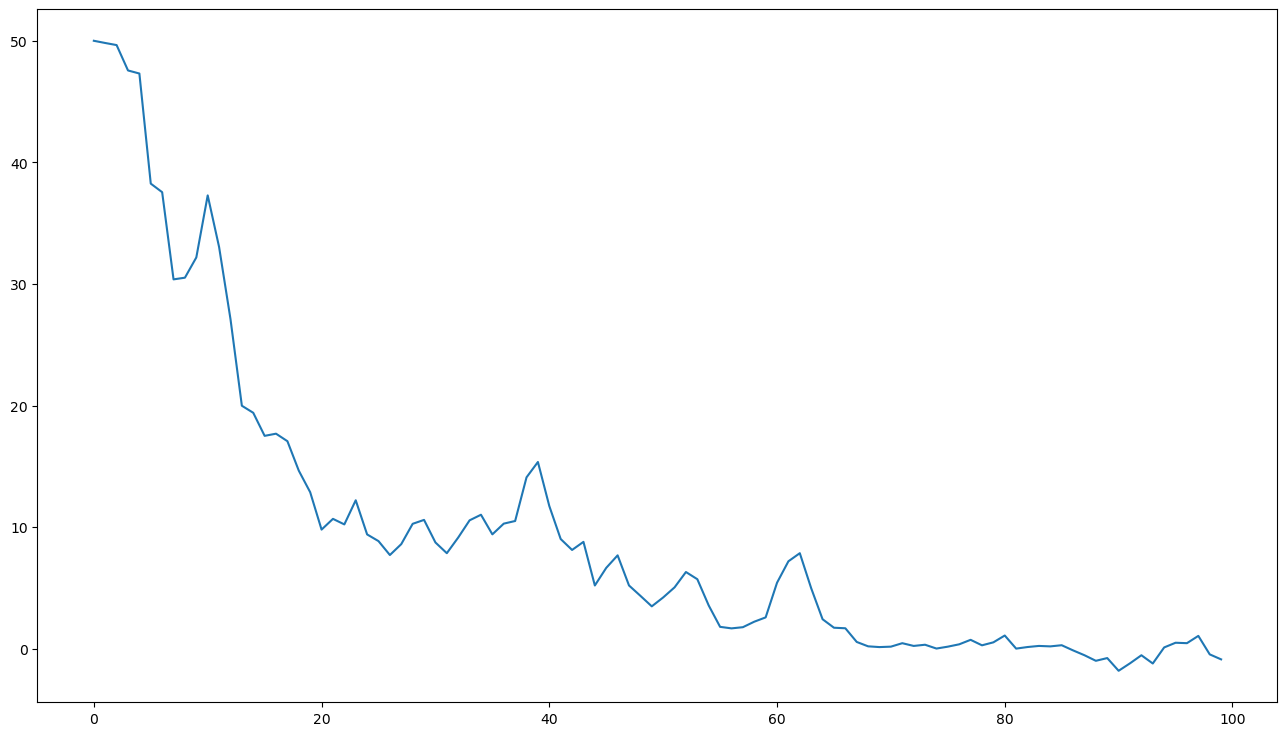

In [261]:
t_sample2,p_sample2 = process_sim2(n,t_e)
fig,axes = plt.subplots(1,1,figsize=(16,9))
axes.plot(t_sample2,p_sample2)    

In [225]:
p_sample1 = process_sim(n,t_e)[1]
p_sample1

array([ 50.   ,  54.839,  53.402,  49.916,  55.525,  54.815,  47.224,
        49.322,  49.644,  49.889,  57.141,  52.468,  63.222,  76.097,
        78.128,  71.167,  74.529,  74.295,  62.695,  61.52 ,  56.017,
        51.159,  48.995,  53.151,  59.987,  64.557,  66.271,  67.02 ,
        67.846,  77.837,  74.053,  79.354,  84.028,  91.547,  86.632,
       101.53 ,  98.379, 105.859, 105.018, 107.638, 106.136, 107.662,
        95.307,  97.863,  93.076, 100.005, 108.   , 115.943, 123.695,
       134.94 , 138.248, 133.568, 138.077, 145.447, 144.938, 152.815,
       154.208, 157.358, 163.742, 174.999, 163.091, 168.014, 154.353,
       149.187, 163.453, 167.057, 177.988, 182.699, 181.067, 166.594,
       160.311, 156.925, 155.596, 165.367, 171.537, 182.709, 184.049,
       184.468, 195.43 , 192.581, 191.575, 190.79 , 178.652, 167.539,
       146.145, 147.53 , 151.938, 154.904, 148.522, 148.143, 146.747,
       161.812, 164.403, 170.028, 167.103, 180.852, 177.17 , 182.66 ,
       185.708, 184.

### The ftrack data from the github repo

In [90]:
p_data = [50,46.743,46.751,40.915,45.066,50.56,44.448,40.518,40.145,39.551,42.887,40.218,44.399,38.416,36.626,35.867,30.252,28.843,26.412,27.815,28.166,32.899,34.738,33.237,24.448,22.771,19.285,24.966,23.912,23.839,23.83,22.253,15.661,20.156,20.166,16.9,15.495,18.734,18.234,17.823,16.052,11.424,9.4223,7.3746,7.2549,7.2847,6.7366,7.7324,6.8572,7.034,5.3564,3.7969,3.4073,4.3653,4.56,4.8884,3.8021,2.9259,3.5701,4.0879,2.3471,0.95298,1.7231,1.7968,1.753,2.1651,2.1354,2.404,2.9188,1.1974,1.3358,1.428,1.8476,2.1991,1.1013,1.3227,0.71634,0.68376,0.89795,1.6167,2.0934,2.4119,1.0693,1.2777,2.2396,0.30283,0.64551,-0.44319,-0.79814,-0.82102,-2.0478,-1.6834,-1.8176,-1.3092,-1.2355,-1.8231,-1.8543,-2.1829,-4.2785,-4.2926]
t_data = np.arange(0,len(p_data))

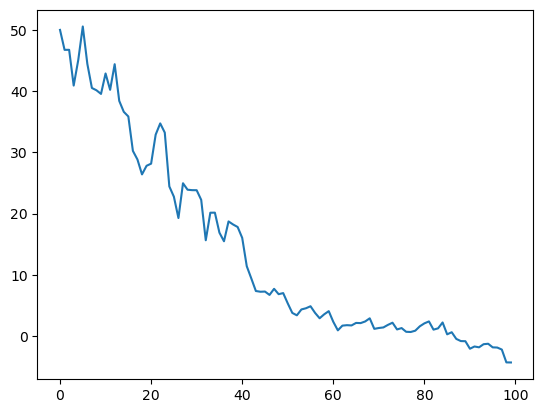

In [229]:
plt.plot(t_data,p_data)

# The cells below are irrevalent, pls ignore

In [218]:
SIGMA_EQ = sigma
SIGMA_FIT = param[1]
ERR = abs(SIGMA_EQ-SIGMA_FIT)
ERR

0.44700964598863985

In [210]:
X = np.linspace(-20,20,1000)

# Gaussian Distribution
norm = stats.norm

# fitting the histogram with the gaussian dist
param = norm.fit(p_t_stamp,floc=0) # floc fixes the the average to be 0
pdf_fit = norm.pdf(X,*param)


# the standard deviation from the derived equation
sigma = np.sqrt((D/LAMBDA) * (1 - np.exp((-2) * LAMBDA * t_stamp))) 
pdf_eq = norm.pdf(X,0,sigma)

/home/sab/miniconda3/envs/jupyter/lib/python3.12/site-packages/scipy/stats/_distn_infrastructure.py:1988: RuntimeWarning: divide by zero encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


The Probability Distribution from the Fokker Planck Dist is given by 

$$ \boxed{P(x,t) \sim Normal(0, \frac{D}{\lambda}[1-e^{-2\lambda t}])} $$

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


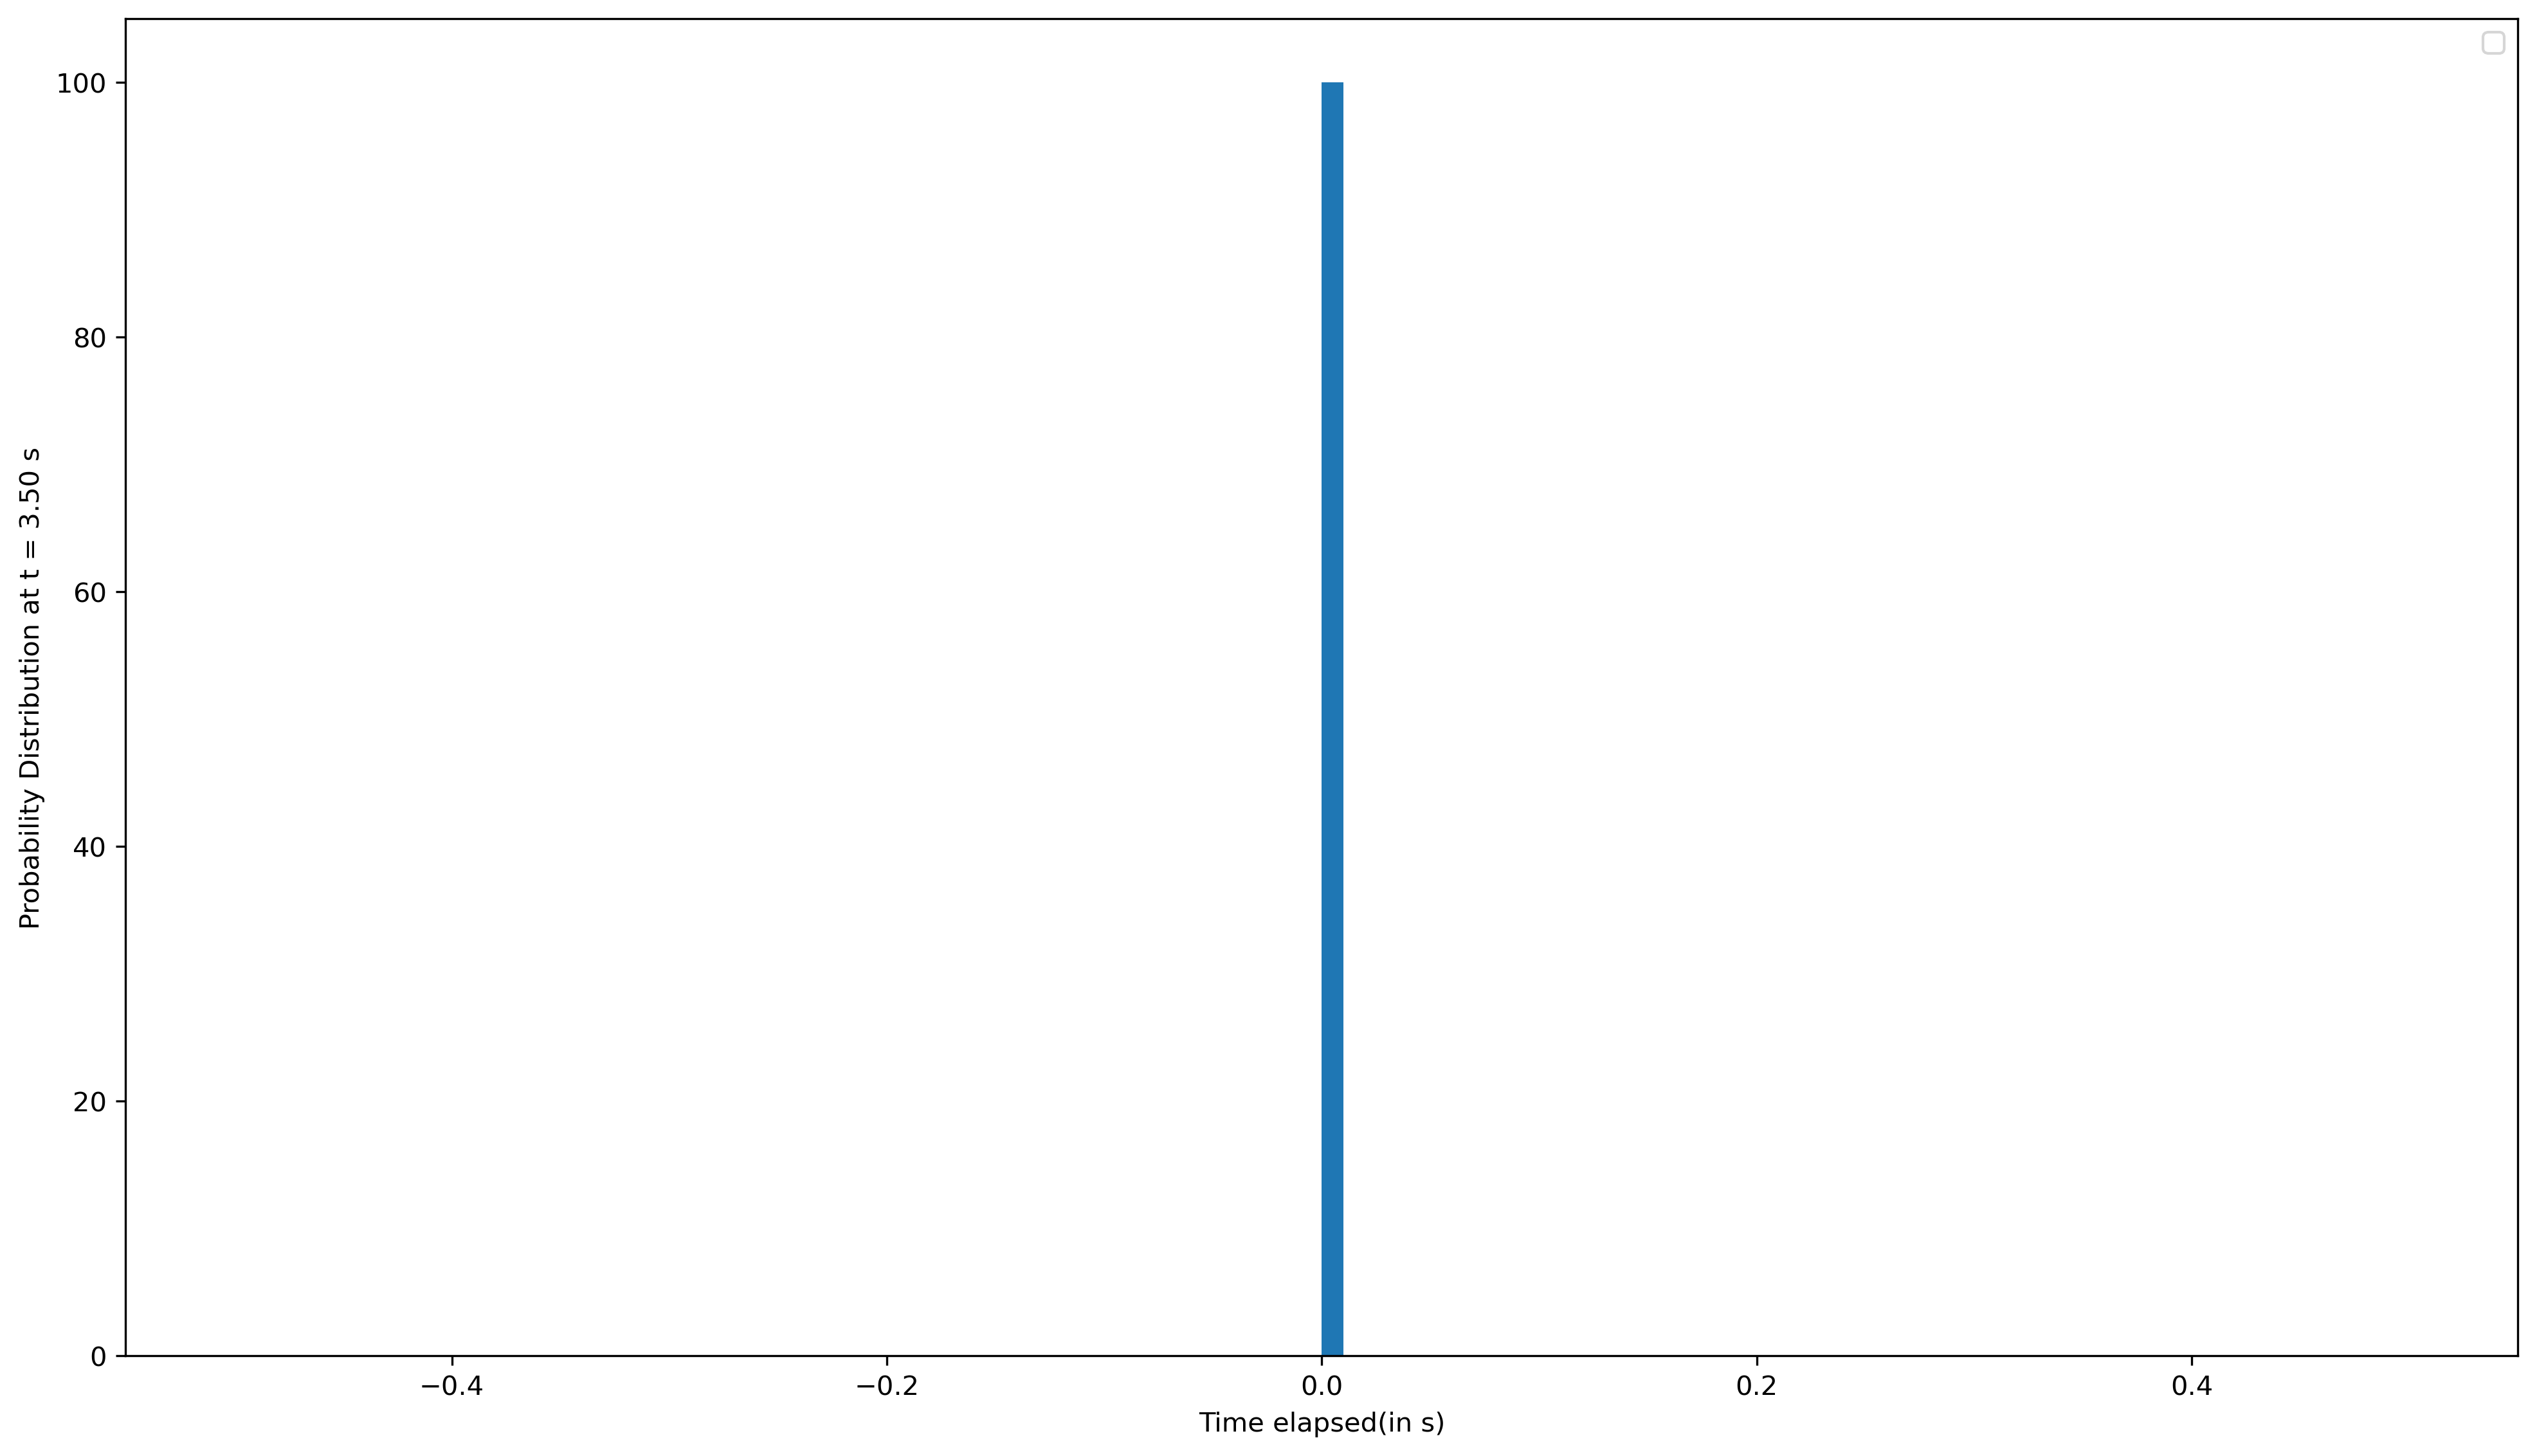

In [78]:
fig,axes = plt.subplots(1,1,figsize=(16,9),dpi=300)
axes.hist(p_t_stamp, bins = 100, density = True);
axes.set_xlabel("Time elapsed(in s)")
axes.set_ylabel("Probability Distribution at t = %.2f s"%t_stamp)
# axes.plot(X,pdf_fit,lw=5,label=rf"scipy.stats.fit with $\mu$ = %.1f, $sigma$ = %.5f"%(param[0],param[1]))
# axes.plot(X,pdf_eq,label=rf"$\sigma$ = %0.4f derived from the equation "%sigma)
axes.legend()